In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [2]:
# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

# download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

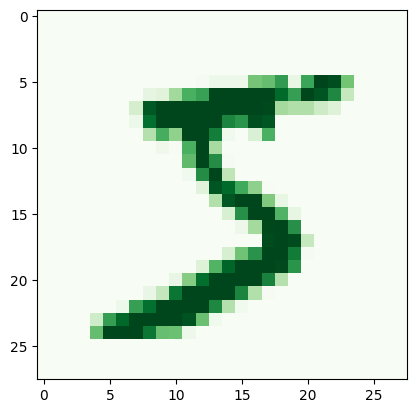

In [22]:
import matplotlib.pyplot as plt
import numpy as np
# show an image from the MNIST dataset
plt.imshow(trainset[0][0].numpy().squeeze(), cmap='Greens')


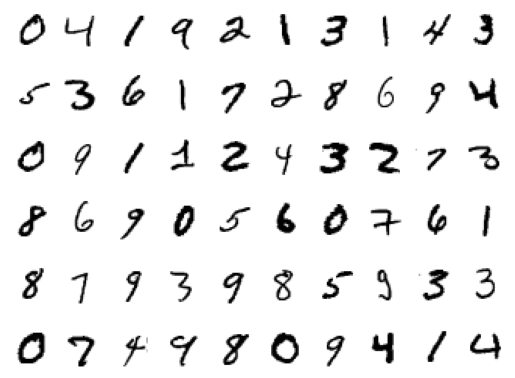

In [31]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images +1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(trainset[index][0].numpy().squeeze(), cmap='gray_r')

In [4]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,10)
    
    def forward(self,x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim =1)
        return x
model = Network()

In [5]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.03)

In [6]:
epochs = 5
losses = []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        average_loss = running_loss / len(trainloader)
        print(f"Training loss: {average_loss}")
        losses.append(average_loss)

Training loss: 0.5972072694903371
Training loss: 0.2787907632834304
Training loss: 0.21597078007294426
Training loss: 0.17560835670370029
Training loss: 0.14823093823691422


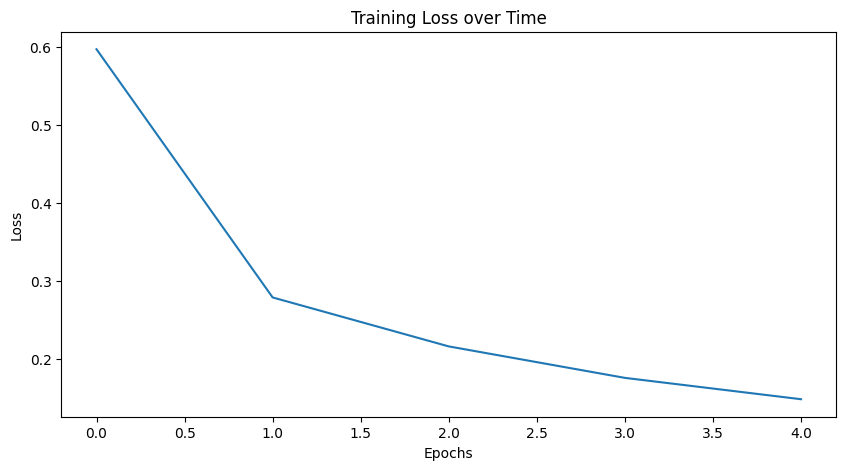

In [7]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.show()

In [8]:
correct_count, all_count = 0, 0
for images, labels in testloader:
    for i in range(len(labels)):
        img = images[i].view(1,784)
        with torch.no_grad():
            logps = model(img)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count+=1
        all_count +=1
print("Number of Images Tests =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number of Images Tests = 10000

Model Accuracy = 0.9562
